# Data Modeling
## Code Sources
### Ken Jee - Data Project from Scratch video series
    [Video Link] (https://www.youtube.com/watch?v=7O4dpR9QMIM)
    [GitHub Repo Link] (https://github.com/PlayingNumbers/ds_salary_proj)
    
### GreekDataGuy
    https://towardsdatascience.com/productionize-a-machine-learning-model-with-flask-and-heroku-8201260503d2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection


df = pd.read_csv('cleantrain.csv')

In [2]:
# choose relevant columns
df_model = df[['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'TotalFinSF', 
               'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold', 'SalePrice']]


In [3]:
# get dummy data
df_dum = pd.get_dummies(df_model)


In [4]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('SalePrice', axis = 1)
y = df_dum.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build Models

### Multiple Linear Regression

In [7]:
# statsmodels regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     46.95
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           4.75e-68
Time:                        20:36:58   Log-Likelihood:                -4377.8
No. Observations:                 357   AIC:                             8784.
Df Residuals:                     343   BIC:                             8838.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.581e+06   3.57e+06     -0.444      0.658   -8.59e+06    5.43e+06
LotArea               0.6362      0.548      1.161      0.246      -0.441       1.714
OverallCond        7999.5081   4504.161      1.776      0.077    -859.746    1.69e+04
YearBuilt             2.2664    346.367      0.007      0.995    -679.004     683.537
YearRemodAdd        835.6317    417.578      2.001      0.046      14.296    1656.968
TotalFinSF           22.4197      5.240      4.278      0.000      12.112      32.727
TotalBath           1.36e+04   6221.223      2.185      0.030    1359.337    2.58e+04
BedroomAbvGr       2.016e+04   5104.917      3.948      0.000    1.01e+04    3.02e+04
GarageCars         6.864e+04   6983.090      9.830      0.000    5.49e+04    8.24e+04
YrSold               51.2536   2118.461      0.024      0.981   -4115.557    4218.064
Foundation_BrkTil -3.099e+05   7.13e+05     -0.434      0.664   -1.71e+06    1.09e+06
Foundation_CBlock -3.294e+05   7.15e+05     -0.461      0.645   -1.74e+06    1.08e+06
Foundation_PConc  -3.188e+05   7.16e+05     -0.445      0.656   -1.73e+06    1.09e+06
Foundation_Slab   -3.007e+05   7.11e+05     -0.423      0.673    -1.7e+06     1.1e+06
Foundation_Wood   -3.225e+05   7.13e+05     -0.452      0.652   -1.73e+06    1.08e+06
==============================================================================
Omnibus:                      128.011   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2795.381
Skew:                           0.933   Prob(JB):                         0.00
Kurtosis:                      16.581   Cond. No.                     2.79e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# sklearn linear model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-32982.85048422652

### Lasso Regression

In [76]:
lm_l = Lasso(alpha=.099)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.394e+10, tolerance: 1.884e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(


-33009.875909432936

In [32]:
# Determine best alpha

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3)))
    
print(alpha)
print(error)

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+10, tolerance: 1.314e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+10, tolerance: 1.314e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]
[-33010.926172664884, -33010.88882758171, -33010.85148249979, -33010.81413741547, -33010.7767923322, -33010.73944724825, -33010.70210216763, -33010.664757082945, -33010.62741200234, -33010.59006691646, -33010.552721835906, -33010.51537674903, -33010.47803166847, -33010.44068658779, -33010.40334149915, -33010.36599

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

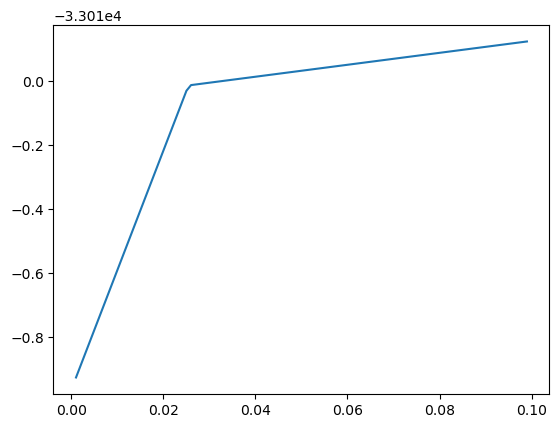

In [33]:
plt.plot(alpha,error)

In [34]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.099,-33009.875909


### Random Forest

In [35]:
# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-23540.580210526314

## Tune Models Using GridsearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'max_features':('auto', 'sqrt', 'log2'), }



In [53]:
gs = GridSearchCV(rf,parameters, scoring='neg_mean_absolute_error', cv=3)


In [54]:
gs.fit(X_train,y_train)

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [55]:
gs.best_score_

-22577.571517027867

In [56]:
gs.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=170)

In [59]:
# test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf =gs.best_estimator_.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

40137.496433003136

In [61]:
mean_absolute_error(y_test,tpred_lml)

40137.34370099346

In [62]:
mean_absolute_error(y_test,tpred_rf)

29087.05947712418

In [66]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

33949.823492042095

# Results
Basic results for our regression models to predict Sale Price on 
the Ames data.
| Model | Set | MAE |
|:---|:---|:---|
|Linear Regression|Training|32983|
|Linear Regression|Test|40137|
|Lasso Regression|Training|33010|
|Lasso Regression|Test|40137|
|Random Forest Regression|Training|23541|
|Random Forest Regression|Test|29087|

## Create API
As I was creating the API I ran into too many issues and ran out of time, so I just set up functions to input the data.  In the future I would like to create a functioning API for this project.

### Sources
    Ken Jee: Creating a Data Science Project from Scratch (Part 6)
    https://www.youtube.com/watch?v=nUOh_lDMHOU
    github repo for this project: https://github.com/PlayingNumbers/ds_...
    
    Article By Chris that we Followed to Create the API: https://towardsdatascience.com/produc...



In [82]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [84]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))



C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([217214.47058824])

In [85]:
list(X_test.iloc[1,:])

[12435.0,
 5.0,
 2001.0,
 2001.0,
 2153.0,
 2.5,
 3.0,
 2.0,
 2008.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

## Predict the sale price of the study house
Features to input:
Lot Area: 23958, Overall Cond:8, Year Built:1962, Year Remodeled: 2005, Total Finished Sqft: 2322, Bathrooms: 1.5, Bedrooms: 4, GarageCars: 2, Year Sold: 2011, Foundation: Poured Concrete

Result: 208,490

In [4]:
import flask
from flask import Flask, jsonify, request
import json
import numpy as np
import pickle

def load_models():
    file_name = "FlaskAPI/models/model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

def predict():    # input study house features
    # features = [['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalFinSF', 'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold','Foundation']]
    x = np.array([[23958, 8, 1962, 2005, 2322, 1.5, 4, 2, 2011, 0, 0,1,0,0]])
    #x = np.array(data_in),reshape(1,-1)    # load model
    model = load_models()
    prediction = model.predict(x)[0]    
    response = json.dumps({'response': prediction})
    return response, 200

predict()

C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


('{"response": 208489.61764705883}', 200)

## Predict the sale price of the study house with updates
Features to input: Lot Area: 23958, Overall Cond:8, Year Built:1962, Year Remodeled: 2011, Total Finished Sqft: 2822, Bathrooms: 2.5, Bedrooms: 5, GarageCars: 2, Year Sold: 2011, Foundation: Poured Concrete

Result: 266,028

In [3]:
def load_models():
    file_name = "FlaskAPI/models/model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

def predict():    # input study house with remodels features
    # features = [['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalFinSF', 'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold','Foundation']]
    x = np.array([[23958, 8, 1962, 2011, 2822, 2.5, 5, 2, 2011, 0, 0,1,0,0]])
    #x = np.array(data_in),reshape(1,-1)    # load model
    model = load_models()
    prediction = model.predict(x)[0]    
    response = json.dumps({'response': prediction})
    return response, 200

predict()

C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


('{"response": 266027.64705882355}', 200)